# ***Proyecto 1. Microestructure***

### Luis Eduardo Jiménez del Muro - 09/09/2025

---

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.integrate import quad
from scipy.stats import erlang
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.6f' % x)

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['grid.alpha'] = 0.3

# **Distribución del precio**

$$
f(x) = \frac{\lambda^k  x^{k-1}  e^{-\lambda x}}{(k-1)!}
$$

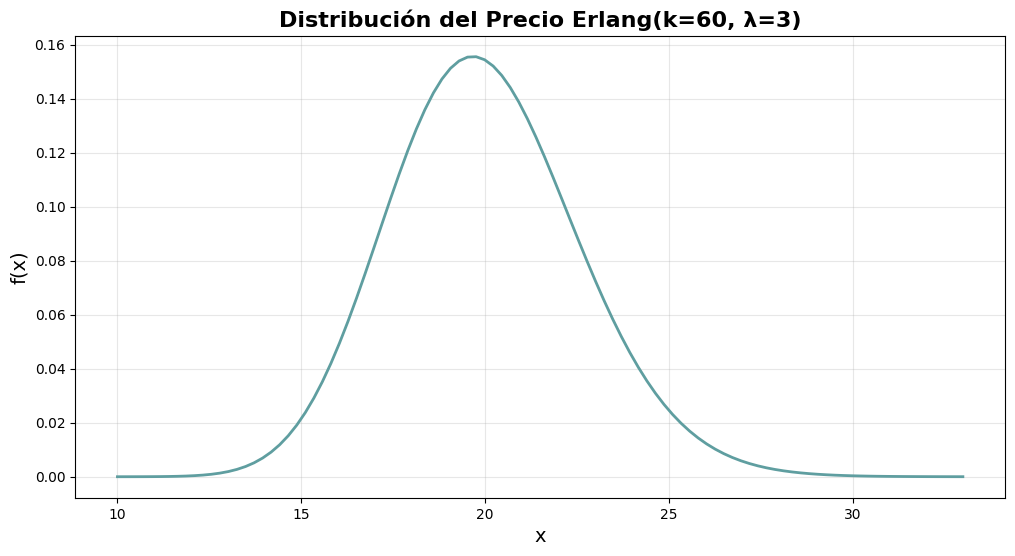

In [2]:
def er(x, k, l):
    return erlang.pdf(x, k, scale=1/l)

x = np.linspace(10, 33, 100)
y = er(x, 60, 3)

plt.figure()
plt.plot(x,y, color='cadetblue', lw=2)
plt.title('Distribución del Precio Erlang(k=60, λ=3)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

# **Gráfica Comparativa**

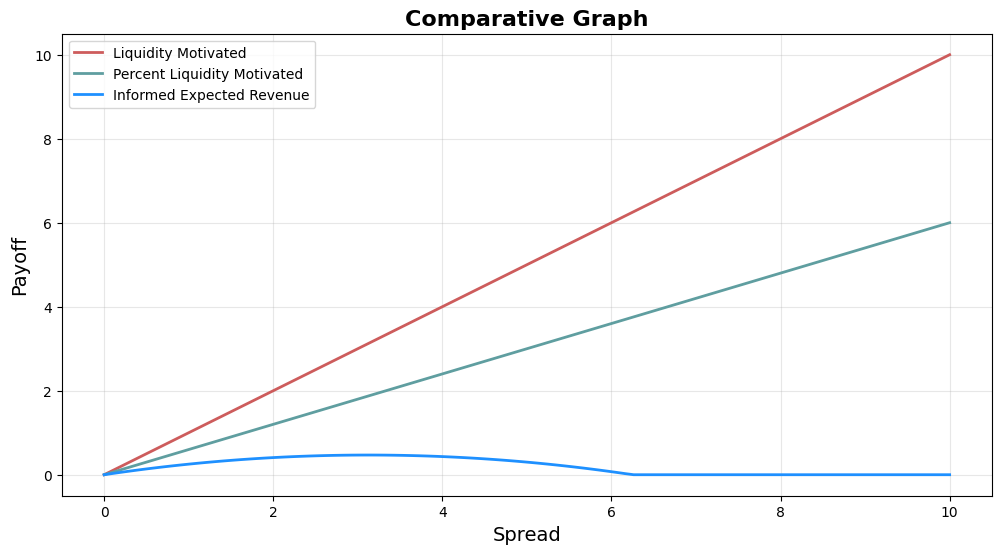

In [3]:
pi = 0.4
pl = 1 - pi

x = np.linspace(0, 10, 100)

def pct_lq_motivated(x):
    return pl*x

def PLBS(x):
    return np.maximum(0.5 - 0.08*x, 0)

def curve(x):
    return PLBS(x) * pl * x

plt.figure()
plt.plot(x, x, color='indianred', label='Liquidity Motivated', lw=2)
plt.plot(x, pct_lq_motivated(x), color='cadetblue', label='Percent Liquidity Motivated', lw=2)
plt.plot(x, curve(x), color='dodgerblue', label='Informed Expected Revenue', lw=2)
plt.title('Comparative Graph')
plt.xlabel('Spread')
plt.ylabel('Payoff')
plt.legend()
plt.grid()
plt.show()

# **Bid/Ask óptimos usando el modelo de Copeland & Galai**

In [4]:
# Parámetros
K = 60
l = 3

pi = 0.4
pl = 1 - pi

S0 = 19.90

S_limsup = 33
S_liminf = 10

#Función objetivo
def objective(x, S0, pi, K, l):
    KA, KB = x

    PLB = np.max(0.5 - 0.08 * (KA-S0), 0)
    PLS = np.max(0.5 - 0.08 * (S0-KB), 0)

    parte1 = (1 - pi) * (PLB*(KA - S0) + PLS*(S0 - KB))
    parte2 = quad(lambda S: (S-KA)*er(S, K, l), KA, S_limsup)[0]
    parte3 = quad(lambda S: (KB - S)*er(S, K, l), S_liminf, KB)[0]

    final_obj = parte1 - pi * (parte2 + parte3)
    return -final_obj

# Inicialización
x0 = np. array([22, 17])

solution = minimize(objective, args=(S0, pi, K, l), x0=x0)

print('Optimal Bid: ', solution.x[1].round(4))
print('Optimal Ask: ', solution.x[0].round(4))

Optimal Bid:  16.4516
Optimal Ask:  23.4277


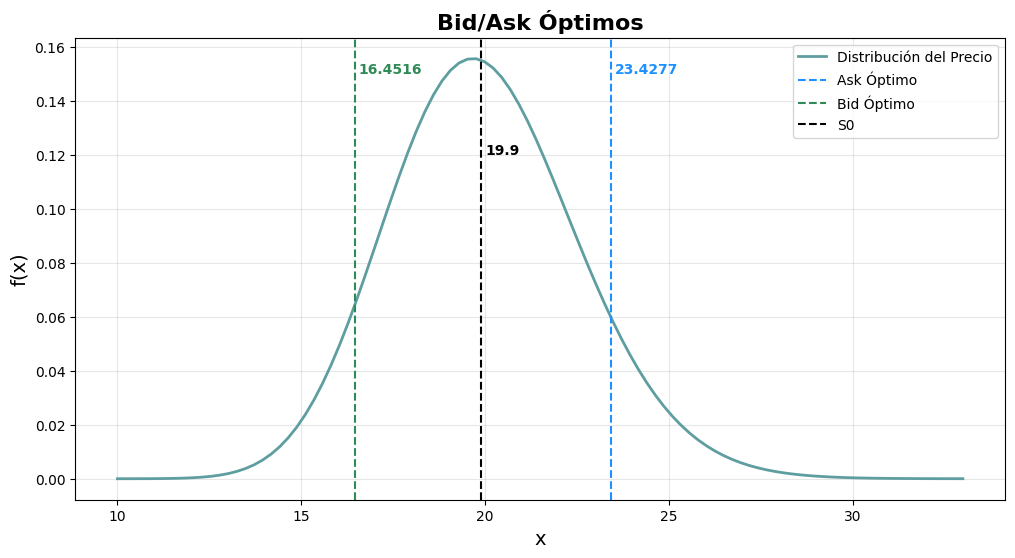

In [5]:
x = np.linspace(10, 33, 100)
y = er(x, 60, 3)

plt.figure()
plt.plot(x,y, color='cadetblue', lw=2, label='Distribución del Precio')
plt.axvline(x=solution.x[0], color='dodgerblue', linestyle='--', label='Ask Óptimo')
plt.axvline(x=solution.x[1], color='seagreen', linestyle='--', label='Bid Óptimo')
plt.axvline(x=S0, color='k', linestyle='--', label='S0')
plt.text(solution.x[0]+0.1, 0.15, solution.x[0].round(4), color='dodgerblue', fontweight='bold')
plt.text(solution.x[1]+0.1, 0.15, solution.x[1].round(4), color='seagreen', fontweight='bold')
plt.text(S0+0.1, 0.12, S0, color='k', fontweight='bold')
plt.title('Bid/Ask Óptimos')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()